### Read Python Code To Generate: *Graph* and *Call Graphic Tree*

[The Matrix (python parsing code options)](https://wiki.python.org/moin/LanguageParsing) <br>
[(new) Abstract Syntax Tree py std lib](https://docs.python.org/3.6/library/ast.html#module-ast) <br>
[(old) parser py std lib](https://docs.python.org/3.6/library/parser.html) <br>
****
[callgraph pypi (jupyter friendly)](https://pypi.org/project/callgraph/) <br>
[pycallgraph docs](http://pycallgraph.slowchop.com/en/master/) <br>
[callgraph py github](https://github.com/gak/pycallgraph/#python-call-graph) <br>
[callgraph magics](https://github.com/osteele/callgraph/blob/master/examples/callgraph-magic-examples.ipynb) <br>
****
[graphviz python git](https://github.com/xflr6/graphviz) <br>
[graphviz python docs](https://graphviz.readthedocs.io/en/stable/) <br>
[Graphviz Org (Lib)](https://www.graphviz.org/) <br>
****
##### Intentionally Left Bank
###### (for dislexics)
[]() <br>
[]() <br>
[]() <br>
****
[Stack Overflow](https://stackoverflow.com/questions/13963321/build-a-call-graph-in-python-including-modules-and-functions) <br>
****
[pyan.py module github](https://github.com/ejrh/ejrh/blob/master/utils/pyan.py) <br>
[pyan.py V1, V2 github](https://github.com/dafyddcrosby/pyan) <br>
[pyan.py V3](https://github.com/davidfraser/pyan) <br>
****
[blog: think too much](http://www.thinktoomuch.net/2007/06/06/python-call-graphs/) <br>
[]() <br>
[Prashanth Ellinia (In Pursuit of Truth)](http://blog.prashanthellina.com/generating-call-graphs-for-understanding-and-refactoring-python-code.html) <br>

```python
#!/usr/bin/env python
# found at 
# http://code.prashanthellina.com/code/construct_call_graph.py
"""
generates call graph of given python code file
in dot format input for graphviz.

limitations:
* statically tried to figure out functions calls
* does not understand classes
* algorithm is naive and may not statically find
  all cases
"""

import sys
import parser
import symbol, token
import pprint
import optparse

try: s = set()
except: import sets; set = sets.Set

def annotate_ast_list(ast_list):
    code = ast_list[0]
    if code in symbol.sym_name: code = symbol.sym_name[code]
    else: code = token.tok_name[code]
    ast_list[0] = code

    for index, item in enumerate(ast_list):
        if index == 0: continue
        if isinstance(item, list):
            ast_list[index] = annotate_ast_list(item) 
    return ast_list
 
def get_atom_name(atom):
    first_child = atom[1]
    first_child_code = first_child[0]
    if first_child_code != token.NAME: return None
    return first_child[1]

def get_fn_call_data(ast_list):
    if len(ast_list) < 3: return None
    first_child, second_child = ast_list[1:3]
    first_child_code = first_child[0]
    if first_child_code != symbol.atom: return None
    fn_name = get_atom_name(first_child)

    second_child_code = second_child[0]
    if second_child_code != symbol.trailer: return None
    
    if len(second_child) < 3: return None
    if second_child[1][0] == token.LPAR and second_child[-1][0] == token.RPAR:
        return fn_name
    else: return None

def find_fn_call(ast_list, calls):
    code = ast_list[0]
    if code == symbol.power:
        fn_name = get_fn_call_data(ast_list)
        if fn_name != None and getattr(__builtins__, fn_name, None) == None: calls.add(fn_name) 
   
    for item in ast_list[1:]:
        if isinstance(item, list):
            find_fn_call(item, calls)

def process_fn(fn_ast_list, call_graph):
    dummy, dummy, func_name = fn_ast_list[:3]
    dummy, func_name = func_name

    calls = set()
    find_fn_call(fn_ast_list, calls)

    call_graph[func_name] = list(calls)

def construct_call_graph(ast_list, call_graph):
    code = ast_list[0]
    if code == symbol.funcdef:
        process_fn(ast_list, call_graph)

    for item in ast_list[1:]:
        if isinstance(item, list):
            construct_call_graph(item, call_graph)

    return call_graph

def generate_dot_code(python_code):
    ast = parser.suite(python_code)
    ast_list = parser.ast2list(ast)
    #annotated_ast_list = annotate_ast_list(ast_list)
    #pprint.pprint(annotated_ast_list)

    call_graph = {}
    construct_call_graph(ast_list, call_graph)
    #pprint.pprint(call_graph)

    dot = []

    dot.append("digraph G {")
    dot.append("rankdir=LR")
    for from_fn, to_fns in call_graph.iteritems():
        if not to_fns:
            dot.append('%s;' % from_fn)

        for to_fn in to_fns:
            if to_fn not in call_graph: continue
            dot.append('%s -> %s;' % (from_fn, to_fn))
    dot.append("}")

    return '\n'.join(dot)

if __name__ == '__main__':
    oparser = optparse.OptionParser()

    oparser.add_option('-i', '--input-file', default=None, metavar='FILE', help='python code file to process')

    options, args = oparser.parse_args()

    if options.input_file:
        python_code = open(options.input_file).read()
    else:
        python_code = sys.stdin.read()

    dot_code = generate_dot_code(python_code)
    print dot_code
```

In [1]:
import callgraph

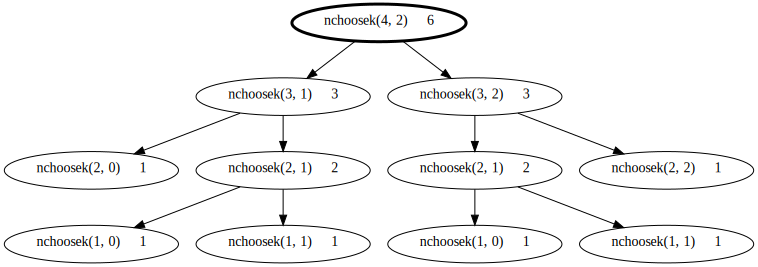

In [2]:
%load_ext callgraph

def nchoosek(n, k):
    if k == 0:
        return 1
    if n == k:
        return 1
    return nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)

%callgraph nchoosek(4, 2)